<a href="https://colab.research.google.com/github/yogiwinardhana/geosai.my.id/blob/main/(241011_geosai)check_geotiff_metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GDAL

In [2]:
from osgeo import gdal

In [14]:
# open geotiff file
file_path = 'https://download.osgeo.org/geotiff/samples/usgs/o41078a6.tif'
dataset = gdal.Open(file_path)

In [15]:
# Check if the dataset was opened successfully
if dataset is None:
    print("Failed to open the file.")
else:
    # Get driver name and raster size
    driver = dataset.GetDriver().ShortName
    print(f"Driver: {driver}")

    cols, rows = dataset.RasterXSize, dataset.RasterYSize
    print(f"Raster Size: {cols} x {rows}")

    # Retrieve metadata
    metadata = dataset.GetMetadata()
    print("\nMetadata:")
    for key, value in metadata.items():
        print(f"{key}: {value}")

    # Geo-Transformation matrix and projection
    geotransform = dataset.GetGeoTransform()
    if geotransform:
        print(f"\nOrigin: ({geotransform[0]}, {geotransform[3]})")
        print(f"Pixel Size: ({geotransform[1]}, {geotransform[5]})")

    projection = dataset.GetProjection()
    print("\nProjection:")
    print(projection)

# Close the dataset
dataset = None

Driver: GTiff
Raster Size: 4984 x 6757

Metadata:
AREA_OR_POINT: Area
TIFFTAG_RESOLUTIONUNIT: 2 (pixels/inch)
TIFFTAG_XRESOLUTION: 72
TIFFTAG_YRESOLUTION: 72

Origin: (688258.223819, 4555765.966137)
Pixel Size: (2.4384, -2.4384)

Projection:
PROJCS["WGS 84 / UTM zone 17N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32617"]]


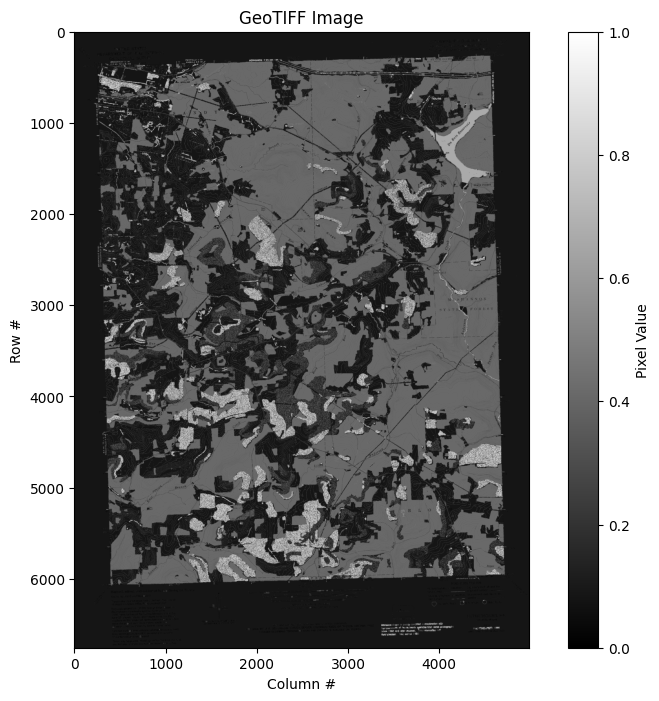

In [12]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

# Open the GeoTIFF file
file_path = 'https://download.osgeo.org/geotiff/samples/usgs/o41078a6.tif'
dataset = gdal.Open(file_path)
if not dataset:
    raise Exception("Failed to open the GeoTIFF file")

# Read the raster band (assuming single-band data)
band = dataset.GetRasterBand(1)
raster_data = band.ReadAsArray()

# Optional: Normalize the data for better visualization
raster_data = np.ma.masked_equal(raster_data, band.GetNoDataValue())
raster_data = (raster_data - raster_data.min()) / (raster_data.max() - raster_data.min())

# Plot the data
plt.figure(figsize=(10, 8))
plt.imshow(raster_data, cmap='gray')  # Use 'gray' or other colormap
plt.colorbar(label='Pixel Value')
plt.title('GeoTIFF Image')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

# Close the dataset
dataset = None